In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

F:\Ananconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset  = pd.read_csv('glassdoor_jobs.csv')
dataset.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
dataset.shape

(956, 15)

In [4]:
dataset.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

## Data Cleaning:

In [5]:
dataset.drop(labels='Unnamed: 0',axis=1, inplace=True)

In [6]:
dataset['Job Title'].value_counts()

Data Scientist                                                    178
Data Engineer                                                      68
Senior Data Scientist                                              42
Data Analyst                                                       18
Senior Data Engineer                                               17
                                                                 ... 
Data Operations Lead                                                1
Software Engineer Staff Scientist: Human Language Technologies      1
Sr. Data Engineer | Big Data SaaS Pipeline                          1
Data Scientist - Sales                                              1
Data Scientist, Senior                                              1
Name: Job Title, Length: 328, dtype: int64

In [7]:
def title_simple(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'machine learning' in title.lower():
        return 'Machine Learning'
    else:
        return 'na'
    

In [8]:
dataset['Job_title_simple'] = dataset['Job Title'].apply(title_simple)

In [9]:
def seniority(title):
    if ('senior' in title.lower()) or ('sr.' in title.lower()) or ('principal' in title.lower()) or ('lead' in title.lower()) or ('staff' in title.lower()) or ('associate' in title.lower()):
        return 'Sr.'
    if 'junior' in title.lower() or 'jr.' in title.lower() or 'jr' in title.lower():
        return 'Jr.'
    else:
        return 'na'
    

In [10]:
dataset['Job_seniority'] = dataset['Job Title'].apply(seniority)

In [11]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na


In [12]:
dataset.Job_title_simple.value_counts()

data scientist      358
na                  238
data engineer       158
analyst             124
manager              36
Machine Learning     26
director             16
Name: Job_title_simple, dtype: int64

In [13]:
#Let us now clean the salary column

In [14]:
dataset = dataset[dataset['Salary Estimate'] != '-1']

In [15]:
salary = dataset['Salary Estimate'].apply(lambda x: x.split('(')[0])     #each element of the series is fed into the lambda function

In [16]:
type(salary)

pandas.core.series.Series

In [17]:
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [18]:
salary = salary.apply(lambda x: x.replace('$','').replace('K',''))

In [19]:
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [20]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '117-2

In [21]:
#Creating column for per hour
dataset['Per Hour'] = salary.apply(lambda x: 1 if 'per hour' in x.lower() else 0)

In [22]:
#Creating column for employer provided
dataset['Employer_provided'] = salary.apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

In [23]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0


In [24]:
salary = salary.apply(lambda x : x.replace('Per Hour','').replace('Employer Provided Salary:','').strip())

In [25]:
dataset['min_limit'] = salary.apply(lambda x: x.split('-')[0]).astype(int)
dataset['max_limit'] = salary.apply(lambda x: x.split('-')[1]).astype(int)

In [26]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided,min_limit,max_limit
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,53,91
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0,63,112
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0,80,90
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0,56,97
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0,86,143


In [27]:
dataset.min_limit.dtype

dtype('int32')

In [28]:
dataset['Avg_salary'] = (dataset.max_limit + dataset.min_limit) / 2

In [29]:
dataset[dataset['Per Hour'] == 1][['min_limit','max_limit']]

,min_limit,max_limit
197,17,24
209,21,34
240,18,25
247,21,34
257,15,25
307,17,24
337,21,34
427,18,25
437,24,39
456,21,34


In [30]:
#coverting hourly to yearly approx. 
dataset['min_limit'] = dataset.apply(lambda x : x['min_limit']*2 if x['Per Hour'] == 1 else x['min_limit'], axis=1)
dataset['max_limit'] = dataset.apply(lambda x : x['max_limit']*2 if x['Per Hour'] == 1 else x['max_limit'], axis=1)

In [31]:
dataset[dataset['Per Hour'] == 1][['min_limit','max_limit']]

,min_limit,max_limit
197,34,48
209,42,68
240,36,50
247,42,68
257,30,50
307,34,48
337,42,68
427,36,50
437,48,78
456,42,68


In [32]:
pd.set_option('display.max_columns', None)

In [33]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided,min_limit,max_limit,Avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0,80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0,56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0,86,143,114.5


In [34]:
dataset['Company Name'] = dataset['Company Name'].apply(lambda x: x.split('\n')[0])

In [35]:
dataset.Location.apply(lambda x : x.split(',')[1].strip()).unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'Los Angeles', 'UT',
       'TN', 'DE', 'ID', 'RI', 'IA', 'SC', 'KS'], dtype=object)

In [36]:
dataset['State'] = dataset.Location.apply(lambda x : x.split(',')[1].strip())

In [37]:
dataset['State'] = dataset.State.apply(lambda x: x.replace('Los Angeles', 'CA'))

In [38]:
dataset.Founded.dtype

dtype('int64')

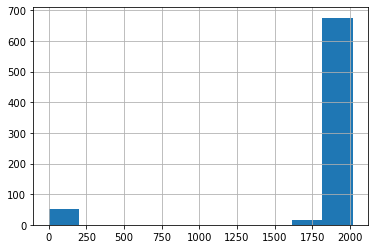

In [39]:
dataset.Founded.hist()

In [40]:
dataset.Founded.unique()

array([1973, 1984, 2010, 1965, 1998, 2000, 2008, 2005, 2014, 2009, 2011,
       1968, 1962, 2012, 1781, 1995, 1915, 2013, 1935, 1849, 1952, 1852,
       1997, 1996, 1974, 1969, 1870, 1985,   -1, 2015, 1993, 1958, 1986,
       1999, 1925, 1912, 2002, 1863, 1939, 2016, 1885, 2006, 1948, 2003,
       1927, 1978, 1860, 2017, 1942, 1990, 1988, 2001, 2007, 1992, 1994,
       1977, 2019, 1982, 1937, 1878, 1966, 1971, 1943, 1987, 1945, 1846,
       1851, 1976, 1981, 1970, 1951, 1967, 1961, 1964, 1930, 1917, 1883,
       1887, 2004, 1850, 1902, 1744, 1929, 1947, 1991, 1989, 1928, 1875,
       1913, 1972, 1856, 1983, 1922, 1812, 1914, 1980, 1954, 1830, 1975,
       1899, 1979, 1889], dtype=int64)

In [41]:
dataset.Founded.apply(lambda x: 2020-x if x>0 else x)

0       47
1       36
2       10
3       55
4       22
      ... 
950    190
951     14
952     36
953     -1
955     53
Name: Founded, Length: 742, dtype: int64

In [42]:
dataset['Comapany_age'] = dataset.Founded.apply(lambda x: 2020-x if x>0 else x)

In [43]:
dataset['Job Description']

0      Data Scientist\nLocation: Albuquerque, NM\nEdu...
1      What You Will Do:\n\nI. General Summary\n\nThe...
2      KnowBe4, Inc. is a high growth information sec...
3      *Organization and Job ID**\nJob ID: 310709\n\n...
4      Data Scientist\nAffinity Solutions / Marketing...
                             ...                        
950    Site Name: USA - Massachusetts - Cambridge\nPo...
951    THE CHALLENGE\nEventbrite has a world-class da...
952    The Auton Lab at Carnegie Mellon University is...
953    Data Science ManagerResponsibilities:\n\nOvers...
955    Returning Candidate? Log back in to the Career...
Name: Job Description, Length: 742, dtype: object

In [44]:
dataset['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0).value_counts()

1    392
0    350
Name: Job Description, dtype: int64

In [45]:
dataset['python_job'] = dataset['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0)
dataset['excel_job'] = dataset['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0)
dataset['aws_job'] = dataset['Job Description'].apply(lambda x : 1 if 'aws' in x.lower() else 0)
dataset['spark_job'] = dataset['Job Description'].apply(lambda x : 1 if 'spark' in x.lower() else 0)

In [46]:
dataset.spark_job.value_counts()

0    575
1    167
Name: spark_job, dtype: int64

In [47]:
dataset.aws_job.value_counts()

0    566
1    176
Name: aws_job, dtype: int64

In [48]:
dataset['rstudio_jobs'] = dataset['Job Description'].apply(lambda x:1 if 'r studio' in x.lower() else 0)

In [49]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided,min_limit,max_limit,Avg_salary,State,Comapany_age,python_job,excel_job,aws_job,spark_job,rstudio_jobs
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,53,91,72.0,NM,47,1,1,0,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0,63,112,87.5,MD,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0,80,90,85.0,FL,10,1,1,0,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0,56,97,76.5,WA,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0,86,143,114.5,NY,22,1,1,0,0,0


In [50]:
dataset['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)

In [51]:
def owernship_simple(tt):
    if 'private' in tt.lower():
        return 'Private'
    elif 'public' in tt.lower():
        return 'Public'
    elif ('-1' in tt) or ('Unknown' in tt):
        return 'Other Organization'                            #adding unkown and -1 to already 'Other Organization'
    else:
        return tt
    

In [52]:
dataset['Type of ownership'] = dataset['Type of ownership'].apply(owernship_simple)

In [53]:
dataset.Industry.value_counts().head(10)  #Taking top 10 and rest replacing with others

Biotech & Pharmaceuticals                  112
Insurance Carriers                          63
Computer Hardware & Software                59
IT Services                                 50
Health Care Services & Hospitals            49
Enterprise Software & Network Solutions     42
Internet                                    29
Consulting                                  29
Advertising & Marketing                     25
Aerospace & Defense                         25
Name: Industry, dtype: int64

In [54]:
industry = ['Biotech & Pharmaceuticals' ,        
'Insurance Carriers',                          
'Computer Hardware & Software',             
'IT Services',                               
'Health Care Services & Hospitals',           
'Enterprise Software & Network Solutions',     
'Internet',                                    
'Consulting',                                  
'Advertising & Marketing',                
'Aerospace & Defense']
def industry_type(tt):
    if tt not in industry:
        return 'Other'
    else:
        return tt

In [55]:
dataset.Industry.apply(industry_type).value_counts()

Other                                      259
Biotech & Pharmaceuticals                  112
Insurance Carriers                          63
Computer Hardware & Software                59
IT Services                                 50
Health Care Services & Hospitals            49
Enterprise Software & Network Solutions     42
Consulting                                  29
Internet                                    29
Advertising & Marketing                     25
Aerospace & Defense                         25
Name: Industry, dtype: int64

In [56]:
dataset['industry_simple'] = dataset.Industry.apply(industry_type)

In [57]:
dataset.Sector.unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [58]:
dataset.Revenue.unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [59]:
dataset.Revenue.apply(lambda x: 'Unknown / Non-Applicable' if x == '-1' else x).value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [60]:
dataset['Revenue'] = dataset.Revenue.apply(lambda x: 'Unknown / Non-Applicable' if x == '-1' else x)

In [61]:
dataset.Size.unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [62]:
dataset.Size.apply(lambda x : 'Unknown' if x == '-1' else x).value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: Size, dtype: int64

In [63]:
dataset['Size'] = dataset.Size.apply(lambda x : 'Unknown' if x == '-1' else x)

In [64]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided,min_limit,max_limit,Avg_salary,State,Comapany_age,python_job,excel_job,aws_job,spark_job,rstudio_jobs,industry_simple
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,53,91,72.0,NM,47,1,1,0,0,0,Aerospace & Defense
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0,63,112,87.5,MD,36,1,0,0,0,0,Health Care Services & Hospitals
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0,80,90,85.0,FL,10,1,1,0,1,0,Other
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0,56,97,76.5,WA,55,1,0,0,0,0,Other
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0,86,143,114.5,NY,22,1,1,0,0,0,Advertising & Marketing


## Exploratory Data Analysis:

In [65]:
dataset.describe()

,Rating,Founded,Per Hour,Employer_provided,min_limit,max_limit,Avg_salary,Comapany_age,python_job,excel_job,aws_job,spark_job,rstudio_jobs
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,46.591644,0.528302,0.522911,0.237197,0.225067,0.001348
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,53.778815,0.499535,0.499812,0.425651,0.417908,0.036711
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,59.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000


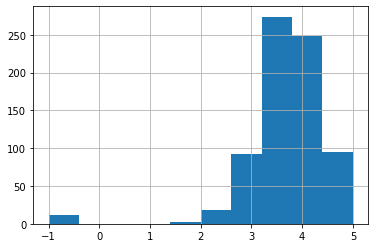

In [66]:
dataset.Rating.hist()

In [67]:
dataset.Rating.unique()

array([ 3.8,  3.4,  4.8,  2.9,  4.1,  3.3,  4.6,  3.5,  3.2,  3.7,  3.6,
        3.9,  4.3,  4.2,  4. ,  4.7,  5. ,  3.1,  4.4,  2.8,  2.7,  1.9,
        4.5,  3. ,  2.3,  2.6, -1. ,  2.4,  2.5,  2.2,  2.1])

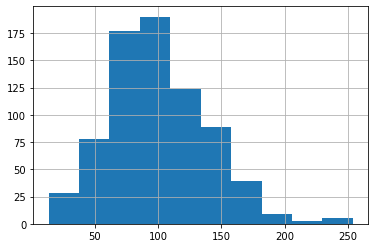

In [68]:
dataset.Avg_salary.hist()      #Normally distributed

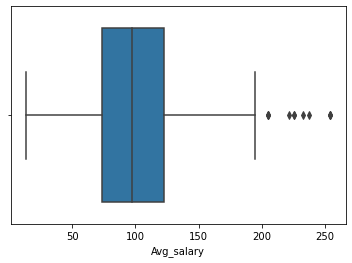

In [69]:
sns.boxplot(x = 'Avg_salary', data = dataset)

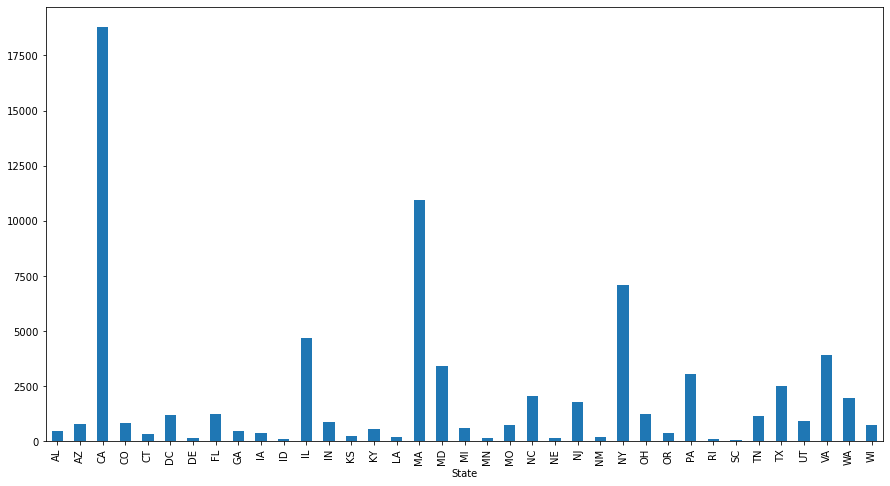

In [70]:
plt.figure(figsize=(15,8))
dataset.groupby('State').sum()['Avg_salary'].plot(kind = 'bar')
plt.show()

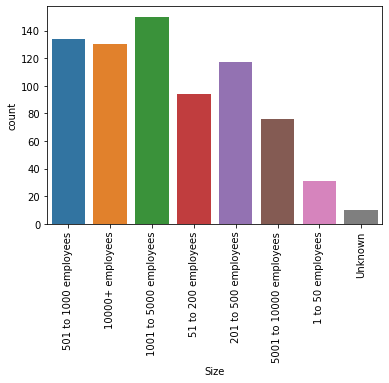

In [71]:
sns.countplot('Size', data = dataset)
plt.xticks(rotation = 90)
plt.show()

In [72]:
dataset.groupby('State').mean()['Avg_salary'].sort_values(ascending=False).head(10)

State
CA    123.513158
IL    116.662500
DC    110.181818
MA    106.281553
NJ    104.558824
MI    100.250000
RI    100.000000
NY     98.652778
NC     98.452381
MD     97.357143
Name: Avg_salary, dtype: float64

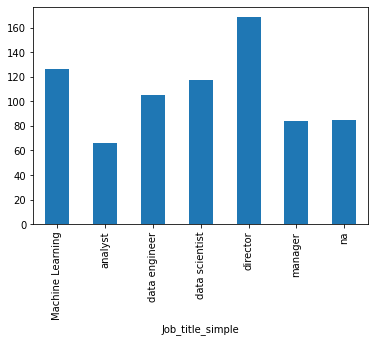

In [73]:
dataset.groupby('Job_title_simple').mean()['Avg_salary'].plot(kind = 'bar')

In [74]:
dataset.groupby('industry_simple').mean()['Avg_salary'].sort_values(ascending = False)

industry_simple
Internet                                   123.810345
Enterprise Software & Network Solutions    115.369048
Computer Hardware & Software               115.194915
Biotech & Pharmaceuticals                  111.767857
Consulting                                 108.689655
Insurance Carriers                         105.626984
Advertising & Marketing                    104.300000
IT Services                                102.840000
Aerospace & Defense                         99.060000
Other                                       90.996139
Health Care Services & Hospitals            67.622449
Name: Avg_salary, dtype: float64

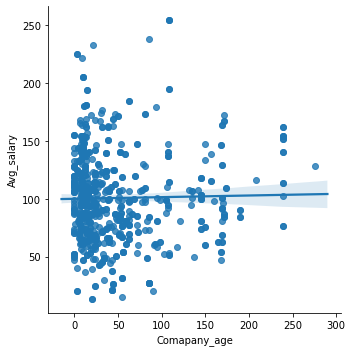

In [75]:
sns.lmplot(x = 'Comapany_age', y='Avg_salary', data = dataset)

## Feature Engineering & Feature Selection:

In [76]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided,min_limit,max_limit,Avg_salary,State,Comapany_age,python_job,excel_job,aws_job,spark_job,rstudio_jobs,industry_simple
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,53,91,72.0,NM,47,1,1,0,0,0,Aerospace & Defense
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0,63,112,87.5,MD,36,1,0,0,0,0,Health Care Services & Hospitals
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0,80,90,85.0,FL,10,1,1,0,1,0,Other
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0,56,97,76.5,WA,55,1,0,0,0,0,Other
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0,86,143,114.5,NY,22,1,1,0,0,0,Advertising & Marketing


In [77]:
dataset.State.unique() #selecting top 10 and rest others

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [78]:
#from above
dataset.State.value_counts().head(10)

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
Name: State, dtype: int64

In [79]:
st = ['CA','MA','NY','VA','IL','MD','PA','TX','WA','NC']    
def st_ten(tt):
    if tt not in st:
        return 'Other'
    else:
        return tt

In [80]:
dataset['job_state'] = dataset.State.apply(st_ten)

In [81]:
dataset['Job_Headquarters'] = dataset.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [82]:
dataset.Job_Headquarters.value_counts()

1    414
0    328
Name: Job_Headquarters, dtype: int64

In [83]:
#Selecting necessary columns

In [84]:
dataset.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title_simple,Job_seniority,Per Hour,Employer_provided,min_limit,max_limit,Avg_salary,State,Comapany_age,python_job,excel_job,aws_job,spark_job,rstudio_jobs,industry_simple,job_state,Job_Headquarters
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,53,91,72.0,NM,47,1,1,0,0,0,Aerospace & Defense,Other,0


In [85]:
dataset.corr()['Avg_salary']

Rating               0.013492
Founded             -0.015149
Per Hour            -0.356082
Employer_provided    0.076287
min_limit            0.967765
max_limit            0.986862
Avg_salary           1.000000
Comapany_age         0.019655
python_job           0.327796
excel_job           -0.057252
aws_job              0.171379
spark_job            0.176559
rstudio_jobs        -0.007688
Job_Headquarters    -0.034641
Name: Avg_salary, dtype: float64

In [86]:
df = dataset.copy()

In [87]:
df = df[['Job_title_simple','Job_seniority','Rating','Size','Type of ownership','Revenue','job_state','Job_Headquarters','python_job','excel_job','aws_job','spark_job',
         'rstudio_jobs','industry_simple','Comapany_age','Avg_salary']]

In [88]:
df.columns

Index(['Job_title_simple', 'Job_seniority', 'Rating', 'Size',
       'Type of ownership', 'Revenue', 'job_state', 'Job_Headquarters',
       'python_job', 'excel_job', 'aws_job', 'spark_job', 'rstudio_jobs',
       'industry_simple', 'Comapany_age', 'Avg_salary'],
      dtype='object')

In [89]:
df.head()

,Job_title_simple,Job_seniority,Rating,Size,Type of ownership,Revenue,job_state,Job_Headquarters,python_job,excel_job,aws_job,spark_job,rstudio_jobs,industry_simple,Comapany_age,Avg_salary
0,data scientist,na,3.8,501 to 1000 employees,Private,$50 to $100 million (USD),Other,0,1,1,0,0,0,Aerospace & Defense,47,72.0
1,data scientist,na,3.4,10000+ employees,Other Organization,$2 to $5 billion (USD),MD,0,1,0,0,0,0,Health Care Services & Hospitals,36,87.5
2,data scientist,na,4.8,501 to 1000 employees,Private,$100 to $500 million (USD),Other,1,1,1,0,1,0,Other,10,85.0
3,data scientist,na,3.8,1001 to 5000 employees,Government,$500 million to $1 billion (USD),WA,1,1,0,0,0,0,Other,55,76.5
4,data scientist,na,2.9,51 to 200 employees,Private,Unknown / Non-Applicable,NY,1,1,1,0,0,0,Advertising & Marketing,22,114.5


In [90]:
#First handling the ordinal categorical values --> Size and Revenue

In [91]:
df.Size.unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown'], dtype=object)

In [92]:
size_order = { 'Unknown':0,'1 to 50 employees':1,
              '51 to 200 employees':2,'201 to 500 employees':3,'501 to 1000 employees':4,
              '1001 to 5000 employees':5,'5001 to 10000 employees':6,'10000+ employees':7
              }
df['company_size_rank'] = df.Size.map(size_order)

In [93]:
df.head(1)

,Job_title_simple,Job_seniority,Rating,Size,Type of ownership,Revenue,job_state,Job_Headquarters,python_job,excel_job,aws_job,spark_job,rstudio_jobs,industry_simple,Comapany_age,Avg_salary,company_size_rank
0,data scientist,na,3.8,501 to 1000 employees,Private,$50 to $100 million (USD),Other,0,1,1,0,0,0,Aerospace & Defense,47,72.0,4


In [94]:
len(df.Revenue.unique())

13

In [95]:
revenue_order = {'Unknown / Non-Applicable':0,'Less than $1 million (USD)':1,'$1 to $5 million (USD)':2,
                 '$5 to $10 million (USD)':3,'$10 to $25 million (USD)':4,'$25 to $50 million (USD)':5,
                 '$50 to $100 million (USD)':6,'$100 to $500 million (USD)':7,'$500 million to $1 billion (USD)':8,
                 '$1 to $2 billion (USD)':9,'$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
                 '$10+ billion (USD)':12
    }
df['Revenue_rank'] = df.Revenue.map(revenue_order)

In [96]:
df.Job_seniority.unique()

array(['na', 'Sr.', 'Jr.'], dtype=object)

In [97]:
job_order = {'na':0,'Sr.':2, 'Jr.':1}
df['Job_senority_rank'] = df.Job_seniority.map(job_order)

In [98]:
#Now handling categorical values

In [99]:
df = pd.get_dummies(df, columns=['Job_title_simple','Type of ownership','job_state','industry_simple'])

In [100]:
df.head(1)

,Job_seniority,Rating,Size,Revenue,Job_Headquarters,python_job,excel_job,aws_job,spark_job,rstudio_jobs,Comapany_age,Avg_salary,company_size_rank,Revenue_rank,Job_senority_rank,Job_title_simple_Machine Learning,Job_title_simple_analyst,Job_title_simple_data engineer,Job_title_simple_data scientist,Job_title_simple_director,Job_title_simple_manager,Job_title_simple_na,Type of ownership_College / University,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private,Type of ownership_Public,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,job_state_CA,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Other,job_state_PA,job_state_TX,job_state_VA,job_state_WA,industry_simple_Advertising & Marketing,industry_simple_Aerospace & Defense,industry_simple_Biotech & Pharmaceuticals,industry_simple_Computer Hardware & Software,industry_simple_Consulting,industry_simple_Enterprise Software & Network Solutions,industry_simple_Health Care Services & Hospitals,industry_simple_IT Services,industry_simple_Insurance Carriers,industry_simple_Internet,industry_simple_Other
0,na,3.8,501 to 1000 employees,$50 to $100 million (USD),0,1,1,0,0,0,47,72.0,4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [101]:
df  = df.drop(columns=['Job_seniority','Size','Revenue'])

In [102]:
df.head()

,Rating,Job_Headquarters,python_job,excel_job,aws_job,spark_job,rstudio_jobs,Comapany_age,Avg_salary,company_size_rank,Revenue_rank,Job_senority_rank,Job_title_simple_Machine Learning,Job_title_simple_analyst,Job_title_simple_data engineer,Job_title_simple_data scientist,Job_title_simple_director,Job_title_simple_manager,Job_title_simple_na,Type of ownership_College / University,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private,Type of ownership_Public,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,job_state_CA,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Other,job_state_PA,job_state_TX,job_state_VA,job_state_WA,industry_simple_Advertising & Marketing,industry_simple_Aerospace & Defense,industry_simple_Biotech & Pharmaceuticals,industry_simple_Computer Hardware & Software,industry_simple_Consulting,industry_simple_Enterprise Software & Network Solutions,industry_simple_Health Care Services & Hospitals,industry_simple_IT Services,industry_simple_Insurance Carriers,industry_simple_Internet,industry_simple_Other
0,3.8,0,1,1,0,0,0,47,72.0,4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3.4,0,1,0,0,0,0,36,87.5,7,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.8,1,1,1,0,1,0,10,85.0,4,7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3.8,1,1,0,0,0,0,55,76.5,5,8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2.9,1,1,1,0,0,0,22,114.5,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [103]:
df.shape

(742, 50)

In [104]:
X = df.drop(columns='Avg_salary')
y = df['Avg_salary']

In [105]:
X.head()

,Rating,Job_Headquarters,python_job,excel_job,aws_job,spark_job,rstudio_jobs,Comapany_age,company_size_rank,Revenue_rank,Job_senority_rank,Job_title_simple_Machine Learning,Job_title_simple_analyst,Job_title_simple_data engineer,Job_title_simple_data scientist,Job_title_simple_director,Job_title_simple_manager,Job_title_simple_na,Type of ownership_College / University,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private,Type of ownership_Public,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,job_state_CA,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Other,job_state_PA,job_state_TX,job_state_VA,job_state_WA,industry_simple_Advertising & Marketing,industry_simple_Aerospace & Defense,industry_simple_Biotech & Pharmaceuticals,industry_simple_Computer Hardware & Software,industry_simple_Consulting,industry_simple_Enterprise Software & Network Solutions,industry_simple_Health Care Services & Hospitals,industry_simple_IT Services,industry_simple_Insurance Carriers,industry_simple_Internet,industry_simple_Other
0,3.8,0,1,1,0,0,0,47,4,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3.4,0,1,0,0,0,0,36,7,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.8,1,1,1,0,1,0,10,4,7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3.8,1,1,0,0,0,0,55,5,8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2.9,1,1,1,0,0,0,22,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Model Implementation:

In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [108]:
#Trying with the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
print('Accuarcy on the training set', lr.score(X_train, y_train))
print('Accuarcy on the test set',lr.score(X_test, y_test))

Accuarcy on the training set 0.5571617462407273
Accuarcy on the test set 0.5826407746050475


In [121]:
#Trying with Random forest
sc = np.mean(cross_val_score(RandomForestRegressor(),X,y,scoring = 'neg_mean_absolute_error', cv=5))
sc = -sc
sc

13.346178515509973

In [110]:
#Checking accuracy of rf
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [111]:
print('Accuarcy on the training set', rf.score(X_train, y_train))
print('Accuarcy on the test set',rf.score(X_test, y_test))

Accuarcy on the training set 0.9517867893022607
Accuarcy on the test set 0.7744326861302331


In [122]:
#tuning the model using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [123]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=240)

In [125]:
mean_absolute_error(y_test, gs.predict(X_test))

11.816928657270521

In [112]:
#Trying with DecisionTrees
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [113]:
print('Accuarcy on the training set', dt.score(X_train, y_train))
print('Accuarcy on the test set',dt.score(X_test, y_test))      #Toooo much overfit.

Accuarcy on the training set 0.9940718860544093
Accuarcy on the test set 0.69635969948703


In [114]:
#Trying with adaboost with base estimator as decison trees (works well with Decison Trees)
ad = AdaBoostRegressor(base_estimator=dt, n_estimators=300)
ad.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=300)

In [115]:
print('Accuarcy on the training set', ad.score(X_train, y_train))
print('Accuarcy on the test set',ad.score(X_test, y_test))

Accuarcy on the training set 0.9693657011924343
Accuarcy on the test set 0.8052421171349333


In [126]:
mean_absolute_error(y_test, ad.predict(X_test))

9.40591598309719

In [127]:
#Therefore adabosst is preferred having an MAE of $9.4K

In [128]:
#Testing accuracy using Adaboost on testing model is 80%